Importing required libraries

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import mplcursors
import seaborn as sns
import os
from dotenv import load_dotenv
from os import listdir
from os.path import isfile, join

In [142]:
load_dotenv()

True

In [143]:
mypath = 'datasets/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles #names of the all datasets

['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

Checking drivers dataset

In [144]:
df = pd.read_csv('datasets/drivers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [145]:
df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


lets check how many drivers number is'\N'

In [146]:
num_null = (df['number'] == r'\N').sum()
num_null 

803

In [147]:
nun_null = (df['number'] != r'\N').sum()
nun_null 

54

Null value in Number column so high there, and there is no impact on the analysis results.
Lets get rid of the column


In [148]:
df = df.drop(labels = ['number', 'code'] , axis=1)
df.head()

,driverId,driverRef,forename,surname,dob,nationality,url
0,1,hamilton,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Q1. Which drivers are among the top 10 youngest in this dataset?

In [149]:
youngest_drivers = df.sort_values(by='dob', ascending=False)[:10]
youngest_drivers

,driverId,driverRef,forename,surname,dob,nationality,url
855,857,piastri,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
850,852,tsunoda,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
844,846,norris,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
853,855,zhou,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
852,854,mick_schumacher,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
851,853,mazepin,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
839,840,stroll,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll
845,847,russell,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...
842,844,leclerc,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc


Q2. Which drivers are among the top 10 oldest in this dataset?

In [150]:
oldest_drivers = df.sort_values(by='dob')[:10]
oldest_drivers

,driverId,driverRef,forename,surname,dob,nationality,url
741,741,etancelin,Philippe,Étancelin,1896-12-28,French,http://en.wikipedia.org/wiki/Philippe_%C3%89ta...
786,786,fagioli,Luigi,Fagioli,1898-06-09,Italian,http://en.wikipedia.org/wiki/Luigi_Fagioli
791,791,biondetti,Clemente,Biondetti,1898-08-18,Italian,http://en.wikipedia.org/wiki/Clemente_Biondetti
703,703,legat,Arthur,Legat,1898-11-01,Belgian,http://en.wikipedia.org/wiki/Arthur_Legat
589,589,chiron,Louis,Chiron,1899-08-03,Monegasque,http://en.wikipedia.org/wiki/Louis_Chiron
760,760,dusio,Piero,Dusio,1899-10-13,Italian,http://en.wikipedia.org/wiki/Piero_Dusio
750,750,brudes,Adolf,Brudes,1899-10-15,German,http://en.wikipedia.org/wiki/Adolf_Brudes
749,749,aston,Bill,Aston,1900-03-29,British,http://en.wikipedia.org/wiki/Bill_Aston
717,717,hans_stuck,Hans,von Stuck,1900-12-27,German,http://en.wikipedia.org/wiki/Hans_Von_Stuck
755,755,schoeller,Rudolf,Schoeller,1902-04-27,Swiss,http://en.wikipedia.org/wiki/Rudolf_Schoeller


Q3. What are the top 10 most common nationalities in the dataset ?

In [151]:
nationality_counts = df.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)
sorted_nationalities.head(10)

nationality
British          165
American         158
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Swiss             23
South African     23
Belgian           23
dtype: int64

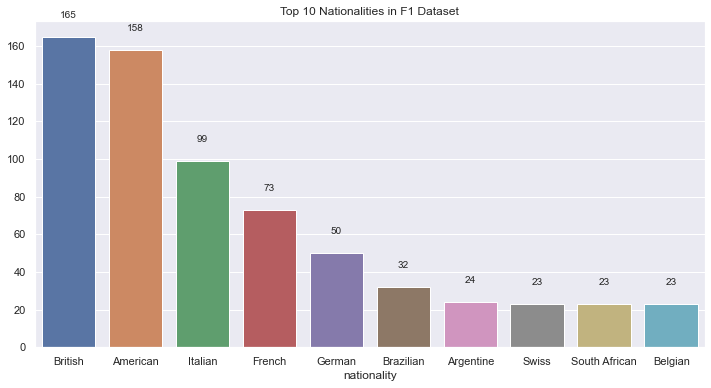

In [152]:
#visualization
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_nationalities.index[:10], y=sorted_nationalities.values[:10])
ax.set_title("Top 10 Nationalities in F1 Dataset")


for i, v in enumerate(sorted_nationalities.values[:10]):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)


plt.show()

In [153]:
df_circuits = pd.read_csv('datasets/circuits.csv')
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [154]:
df_circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


KeyboardInterrupt: 

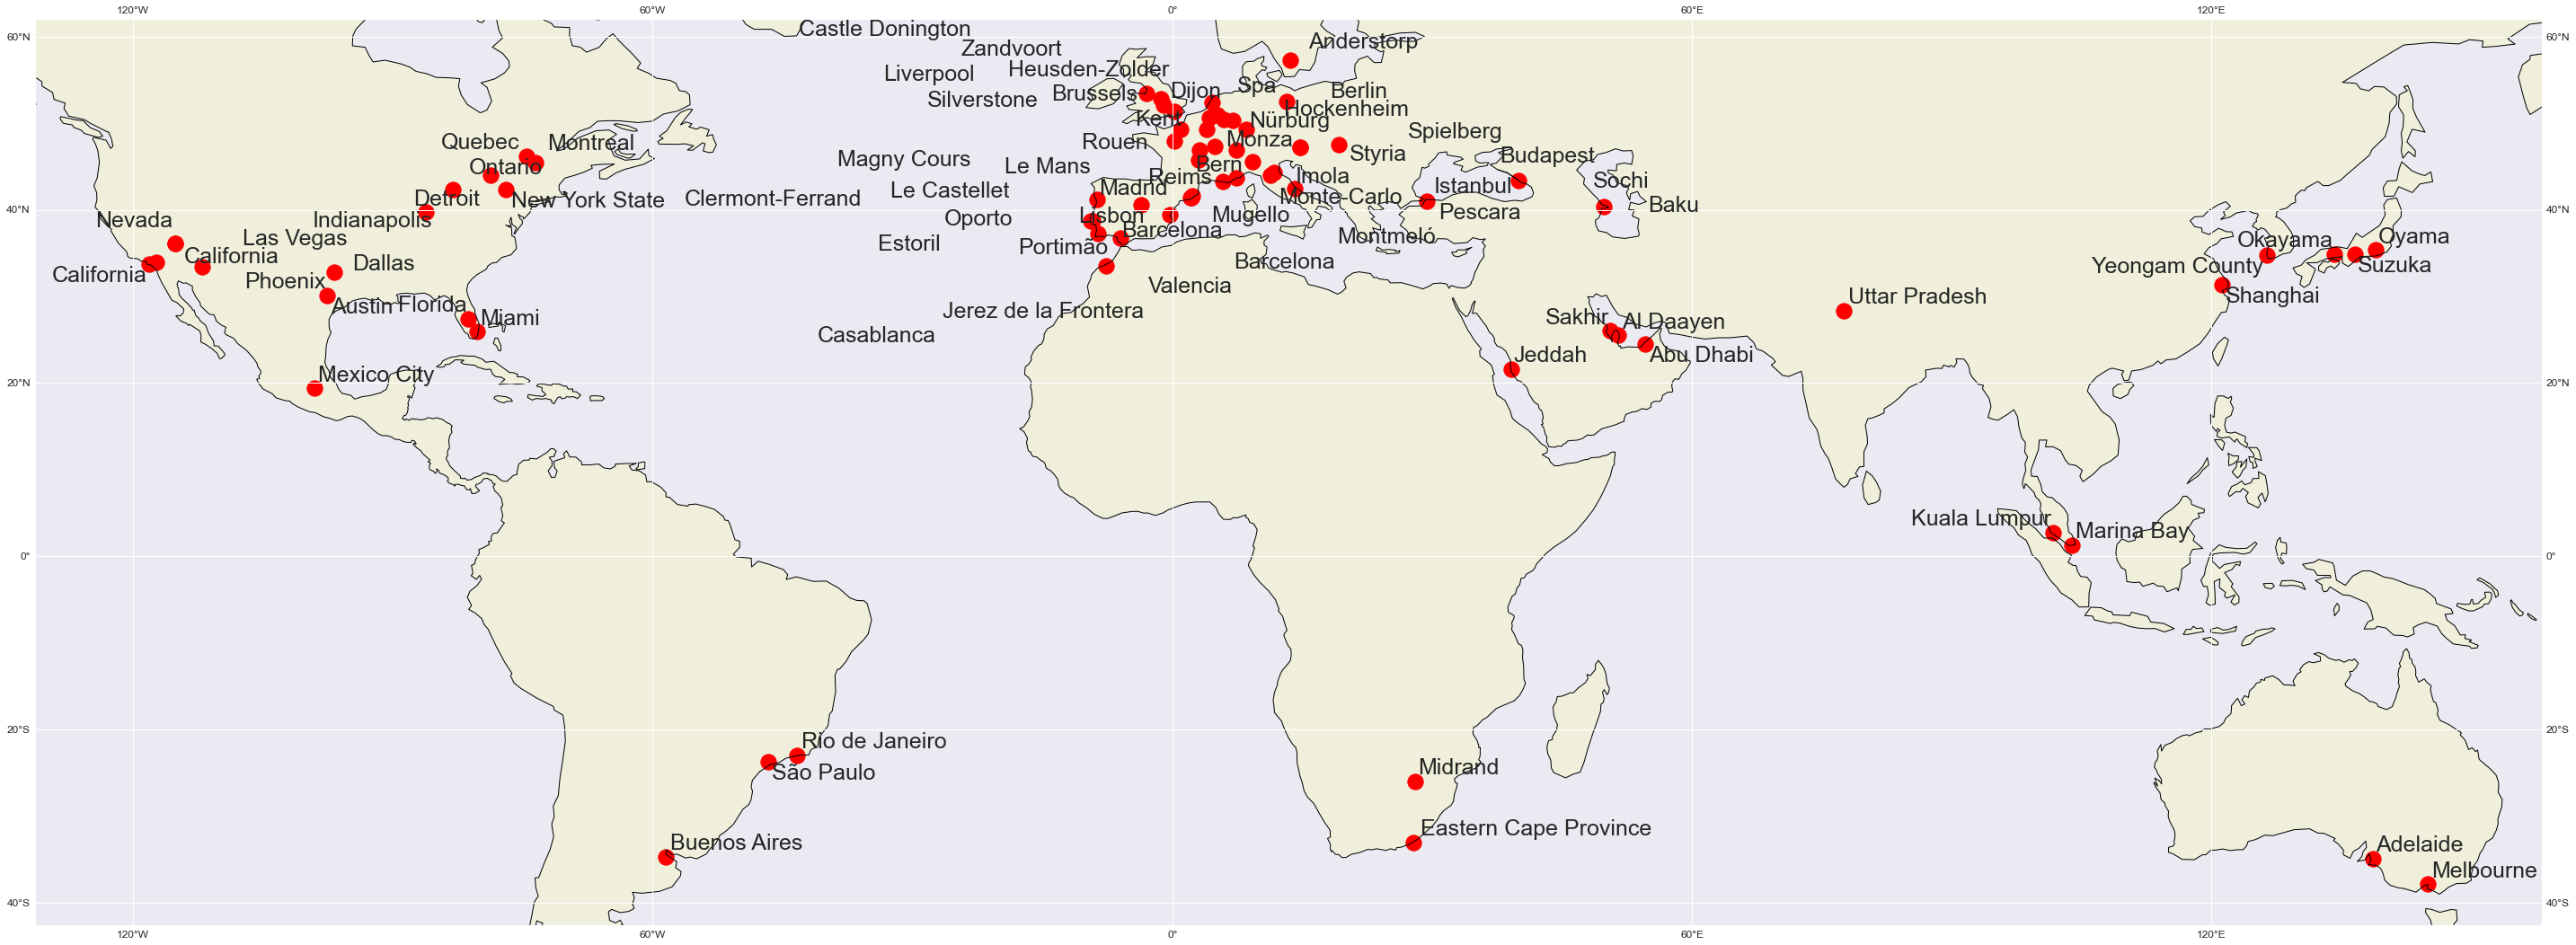

In [155]:
from adjustText import adjust_text #to get rid of location name overlapping issue

fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.LAND)

scatter = ax.scatter(df_circuits['lng'], df_circuits['lat'], s=300, color='red', transform=ccrs.PlateCarree())

texts = []
for i, txt in enumerate(df_circuits['location']):
    texts.append(ax.text(df_circuits['lng'][i]+0.1, df_circuits['lat'][i]+0.1, txt, transform=ccrs.PlateCarree(), fontsize = 25))

adjust_text(texts)

Q5. what are the top 10 most used circuits in f1 history ?
- Procedure: indexing two datasets (circuits.csv and races.csv) in accordance with 'circuitId' feature.

In [ ]:
df_races = pd.read_csv('datasets/races.csv') 
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB


In [ ]:
counts = df_races['circuitId'].value_counts()
circuits_freq = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_freq #most used circuts in order

,circuitId,number of times
0,14,73
1,6,69
2,9,58
3,13,56
4,7,42
...,...,...
72,60,1
73,57,1
74,31,1
75,54,1


In [ ]:
matching_rows = df_circuits[df_circuits['circuitId'].isin(circuits_freq['circuitId'])][[ 'country', 'name', 'circuitId']]
matching_rows = matching_rows.merge(circuits_freq[['circuitId', 'number of times']], on='circuitId')
df_most_circuits = matching_rows.sort_values(by= 'number of times', ascending=False)
df_most_circuits[:10]

,country,name,circuitId,number of times
13,Italy,Autodromo Nazionale di Monza,14,73
5,Monaco,Circuit de Monaco,6,69
8,UK,Silverstone Circuit,9,58
12,Belgium,Circuit de Spa-Francorchamps,13,56
6,Canada,Circuit Gilles Villeneuve,7,42
19,Germany,Nürburgring,20,41
17,Brazil,Autódromo José Carlos Pace,18,40
10,Hungary,Hungaroring,11,38
69,Austria,Red Bull Ring,70,37
9,Germany,Hockenheimring,10,37



Q6. What is the most Grand Prix in F1 history?

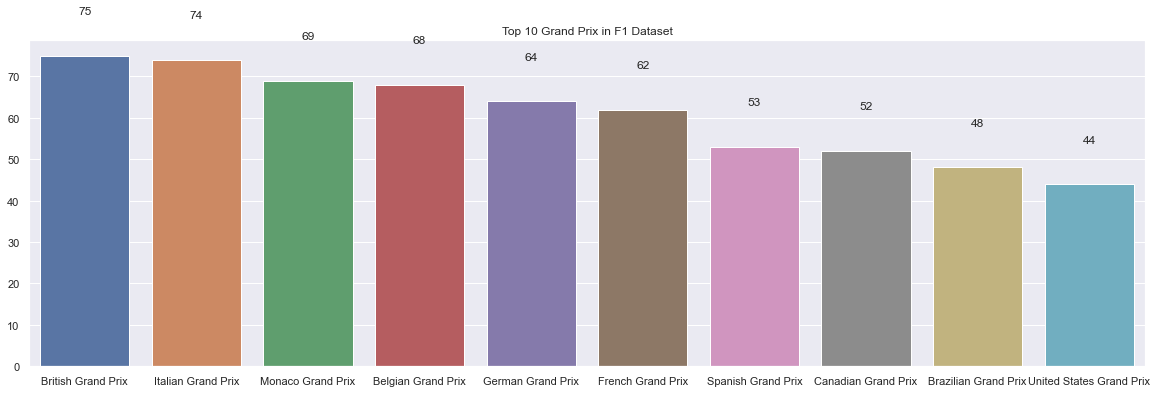

In [ ]:
top_10_grandprix = df_races['name'].value_counts()[:10]


#visualization
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_10_grandprix.index, y=top_10_grandprix.values)
ax.set_title("Top 10 Grand Prix in F1 Dataset")


for i, v in enumerate(top_10_grandprix.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)


plt.show()


Q7. What circuits used for these 10 grand prix as a percentage?
- Note: 74 races happened in British grand Prix and 58 of them happened in Silverstone Circuit. But what about other 16 ? 

In [ ]:
lst = []
for grandprix in top_10_grandprix.index:
    circuitID = df_races.loc[df_races['name'] == grandprix, 'circuitId'].value_counts()
    dfs = df_circuits.loc[df_circuits['circuitId'].isin(circuitID.index), ['circuitId', 'location', 'country', 'name']]
    dfs['number of times'] = circuitID.values
    lst.append(dfs)
r = pd.concat(lst)
r

,circuitId,location,country,name,number of times
8,9,Silverstone,UK,Silverstone Circuit,58
37,38,Kent,UK,Brands Hatch,12
57,58,Liverpool,UK,Aintree,5
13,14,Monza,Italy,Autodromo Nazionale di Monza,73
20,21,Imola,Italy,Autodromo Enzo e Dino Ferrari,1
5,6,Monte-Carlo,Monaco,Circuit de Monaco,69
12,13,Spa,Belgium,Circuit de Spa-Francorchamps,56
39,40,Heusden-Zolder,Belgium,Zolder,10
49,50,Brussels,Belgium,Nivelles-Baulers,2
9,10,Hockenheim,Germany,Hockenheimring,37


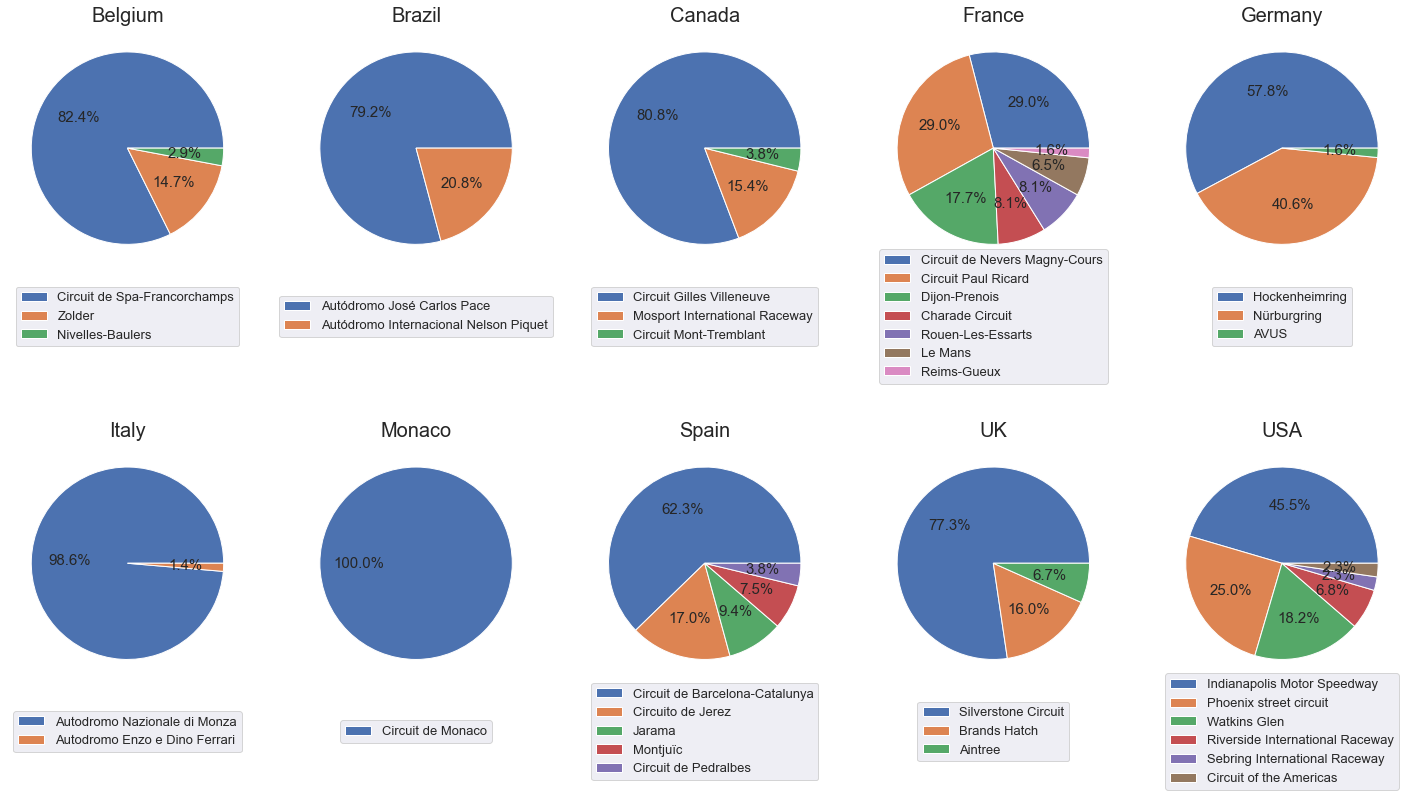

In [ ]:

countries = r.groupby(['country'])['name'].count()

# Loop through each country and count value
fig, axs = plt.subplots(2, 5, figsize=(25, 14))
axs = axs.ravel()

for i, (country, count) in enumerate(countries.items()):
    lst = []
    value = r.loc[r['country'] == country, 'number of times'].values
    label = r[r['country'] == country]['name']
    #Loop through percentage calculation
    for b in range(count):
        calc = value[b]*100/value.sum()
        lst.append(calc)
    
    
    #pie chart
    axs[i].pie(lst, autopct='%1.1f%%',textprops={'fontsize': 15})
    axs[i].set_title(country, fontsize=20)
    axs[i].legend(labels=label.values, loc='center', bbox_to_anchor=(0.5, -0.2), fontsize=13)
    
plt.show()
